# Collection of R_codes

## Table of contents
### 1. Permutation analysis

---
# 1. Permutation analysis

## 1-1. Load permuation data and visualize
If ggpubr is not install, open terminal window and install it.
```
$ sudo R
> install.packages("ggpubr")
```

In [5]:
# Load required library
library(ggplot2)
library(ggpubr) # ggplot2 based publication ready plots

In [37]:
# Load permutated % overlap freezing as csv file
test <- read.table(file="test1.csv",header=FALSE, sep=",")

# Print the first 10 rows of the data
head(test,10)

# Statistical summaries of data
summary(test$V1)

V1
43.54167
36.45833
37.29167
40.20833
38.75000
41.87500
38.12500
36.87500
37.70833
40.62500


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  33.75   37.71   39.17   39.27   40.62   46.04 

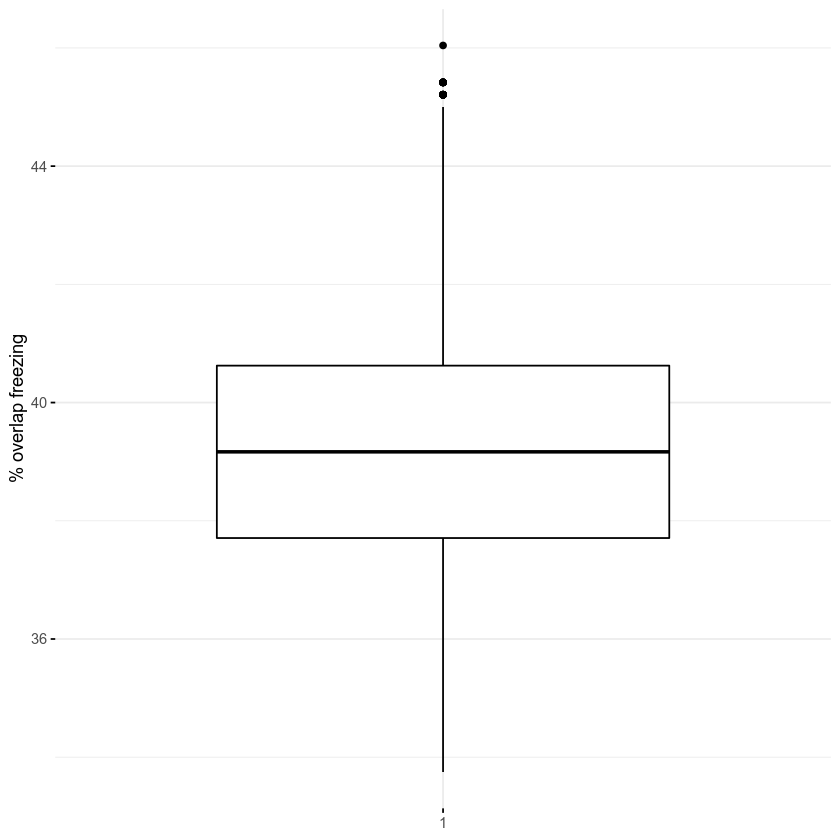

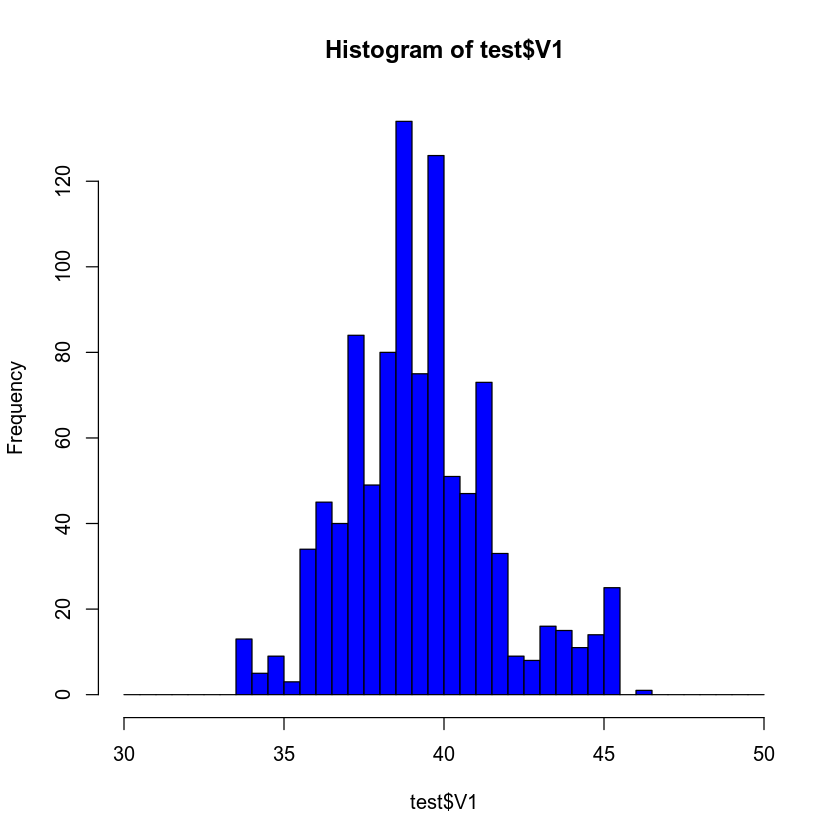

In [44]:
# Visualize permudtated data using box plots
ggboxplot(test$V1, 
          ylab = "% overlap freezing", xlab = FALSE,
          ggtheme = theme_minimal())

# Colored Histogram with Different Number of Bins
hist(test$V1, breaks=seq(30,50,0.5), col="blue", xlim=c(30,50))

# hist(test$V1, breaks=seq(-50,50,1), col="blue", xlim=c(-50,50), ylim=c(0,60))


## 1-2. One-Sample Wilcoxon Signed Rank Test in R
http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r

In [23]:
# We want to know, if the average of the data differs from mu (two-tailed test).

# One-sample wilcoxon test
res <- wilcox.test(test$V1, mu = 44)
# Printing the results
res


	Wilcoxon signed rank test with continuity correction

data:  test$V1
V = 2661, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 44


---
# 2. Distribution of lagtime for onset and offset of freezing
## 2-1. Load lagtime csv file and visualize

In [49]:
# Load csv file
# test <- read.csv(file="C:\\Users\\User\\Dropbox\\Shared w am\\2019-02-19 R03 Brain-to-brain synchrony\\fig\\fear_express_video\\freeze.csv",header=TRUE, sep=",")
test <- read.csv(file="freeze.csv",header=TRUE, sep=",")

test

lagtime,type
0.00,onset
4.25,onset
5.50,onset
-6.00,onset
0.75,onset
0.00,onset
-3.50,onset
2.00,onset
2.25,onset
-0.75,onset


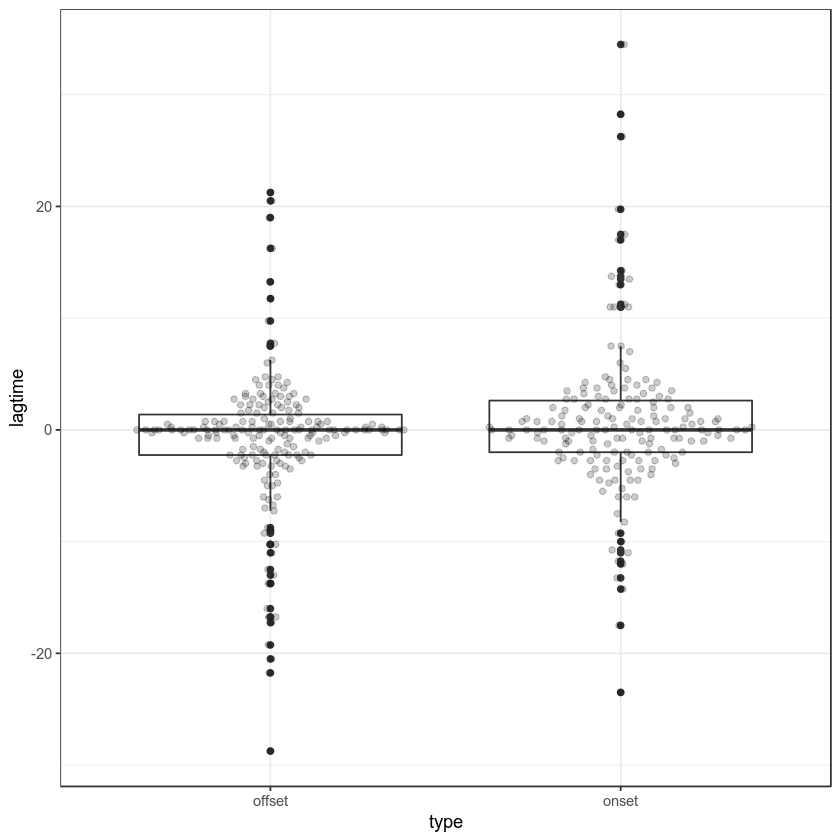

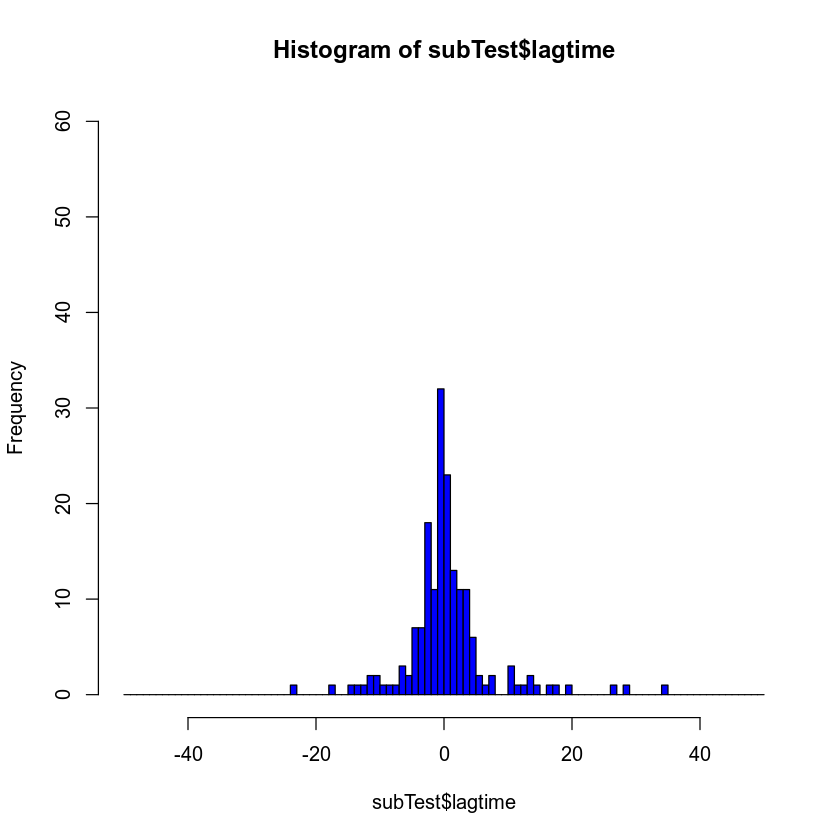

png 
  2

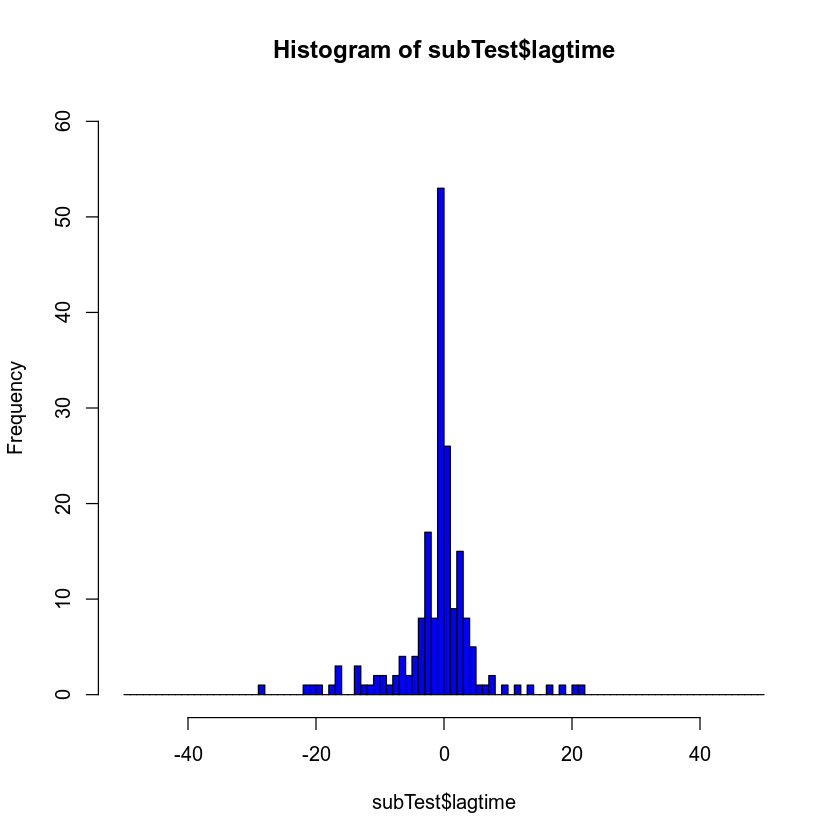

In [35]:
# Plot the distribution
library(ggplot2)
library(ggbeeswarm)

ggplot(test,aes(type,lagtime)) +
 geom_boxplot() +
 geom_quasirandom(alpha = 0.2) +
 theme_bw()

# Colored Histogram with Different Number of Bins
subTest = test[test$type=='onset',]
hist(subTest$lagtime, breaks=seq(-50,50,1), col="blue", xlim=c(-50,50), ylim=c(0,60))

subTest = test[test$type=='offset',]
hist(subTest$lagtime, breaks=seq(-50,50,1), col="blue", xlim=c(-50,50), ylim=c(0,60))


### (Option) Export a plot as EPS file ##############################################
# Change the plot line
setEPS()
postscript("whatever.eps")
plot(rnorm(100), main="Hey Some Data")
dev.off()
#####################################################################################


## 2-2. Test Coefficients of Variation from multiple samples
https://cran.r-project.org/web/packages/cvequality/vignettes/how_to_test_CVs.html

If ggbeeswarm is not install, open terminal window and install it.
```
$ sudo R
> install.packages("ggbeeswarm")
> install.packages("cvequality")
```

In [47]:
# Load required library
library(cvequality)

In [50]:
test1 <- with(test,asymptotic_test(lagtime,type))
test1

$D_AD
[1] 7949.287

$p_value
[1] 0

In [52]:
test2 <- with(test,mslr_test(nr = 1e4, lagtime,type))
test2

$MSLRT
[1] 6.898916

$p_value
[1] 0.008624802

---
# 3. Boxplot for the distribution of lagtime for each animal pair.

In [27]:
# Raw data for lag-time
# "s" stands for onset and "e" stands for offset of freezing
d1 <- c( 0,    -24,    3,    0,   16,    8,    9,   -3,    5,    4,   -3,   -1,  -2 )
e1 <- c("f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s", "f1s") 

d2 <- c(   0,   -9,    0,    0,   13,    0,    0,    4,    2,   -1,   -8,   3)
e2 <- c("f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e", "f1e") 

d3 <- c(14,-1,9,8,-7,0,-8,0,0,-18,0)
e3 <- c("f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s","f2_1s")

d4 <- c(     13,      10,      -3,     -11,      -9,       1,      -3,       3,     -18,      -6,       4,     0)
e4 <- c("f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e", "f2_1e") 

d5 <- c(3,4,0,4,3,1,0,-8,-4,5,11)
e5 <- c("f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s","f2_2s")

d6 <- c(3,1,0,1,1,0,0,-9,-12,3,-2)
e6 <- c("f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e","f2_2e")

d7 <- c(-3,-1,-7,11,-11,3,-13,-2)
e7 <- c("f3_1s","f3_1s","f3_1s","f3_1s","f3_1s","f3_1s","f3_1s","f3_1s")

d8 <- c(-7,0,-2,2,-7,2,-6,0)
e8 <- c("f3_1e","f3_1e","f3_1e","f3_1e","f3_1e","f3_1e","f3_1e","f3_1e")

d9 <- c(3,-12,4,-2,5)
e9 <- c("f3_2s","f3_2s","f3_2s","f3_2s","f3_2s")

d10 <- c(-1,-3,0,-12)
e10 <- c("f3_2e","f3_2e","f3_2e","f3_2e")

d11 <- c(-11,-14,11,16,-57,19)
e11 <- c("f4_1s","f4_1s","f4_1s","f4_1s","f4_1s","f4_1s")

d12 <- c(-16,-10,-25,-1,0)
e12 <- c("f4_1e","f4_1e","f4_1e","f4_1e","f4_1e")

d13 <- c(3,-4,-18,18)
e13 <- c("f4_2s","f4_2s","f4_2s","f4_2s")

d14 <- c(8,3,-13,16,0)
e14 <- c("f4_2e","f4_2e","f4_2e","f4_2e","f4_2e")

# Concatenate the data
d <- c(d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14)
e <- c(e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14)

# Create data frame
mydata <- data.frame(d,e)
# Add column names
names(mydata) <- c("s1_s2","pair")

mydata

s1_s2,pair
0,f1s
-24,f1s
3,f1s
0,f1s
16,f1s
8,f1s
9,f1s
-3,f1s
5,f1s
4,f1s


png 
  2

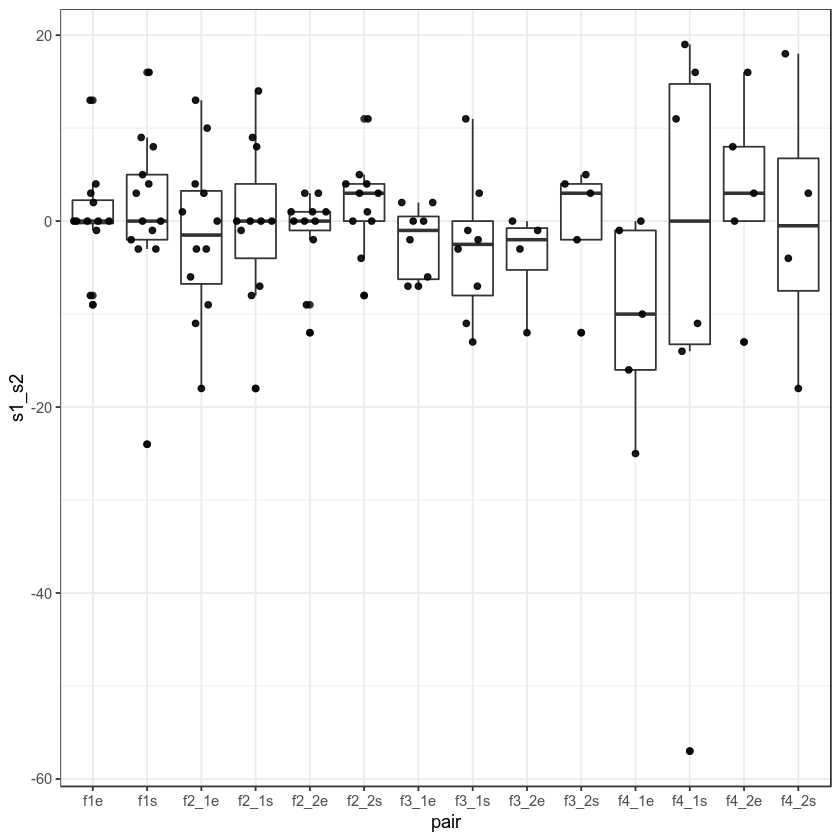

In [28]:
# Boxplot for the distribution of lag-time
library(ggplot2)
library(ggbeeswarm)

ggplot(mydata,aes(pair,s1_s2)) + geom_boxplot() + geom_quasirandom(alpha = 0.9) + theme_bw()

### (Option) Export a plot as EPS file ##############################################
# Change the plot line
setEPS()
postscript("whatever.eps")
plot(rnorm(100), main="Hey Some Data")
dev.off()
#####################################################################################

---

# R version

In [53]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.4                         
year           2018                        
month          03                          
day            15                          
svn rev        74408                       
language       R                           
version.string R version 3.4.4 (2018-03-15)
nickname       Someone to Lean On          

---
# Read csv file and test correlation
The csv file is generated by MATLAB code

[READING IN DATA FROM AN EXTERNAL FILE | R LEARNING MODULES](https://stats.idre.ucla.edu/r/modules/reading-in-data-from-an-external-file/)

In [121]:
test <- read.table('D:\\wataru\\Recording_Analysis\\Bases_dmPFC-BLA\\2017-12-19_vm81a_base\\myFile.txt', sep = ",")

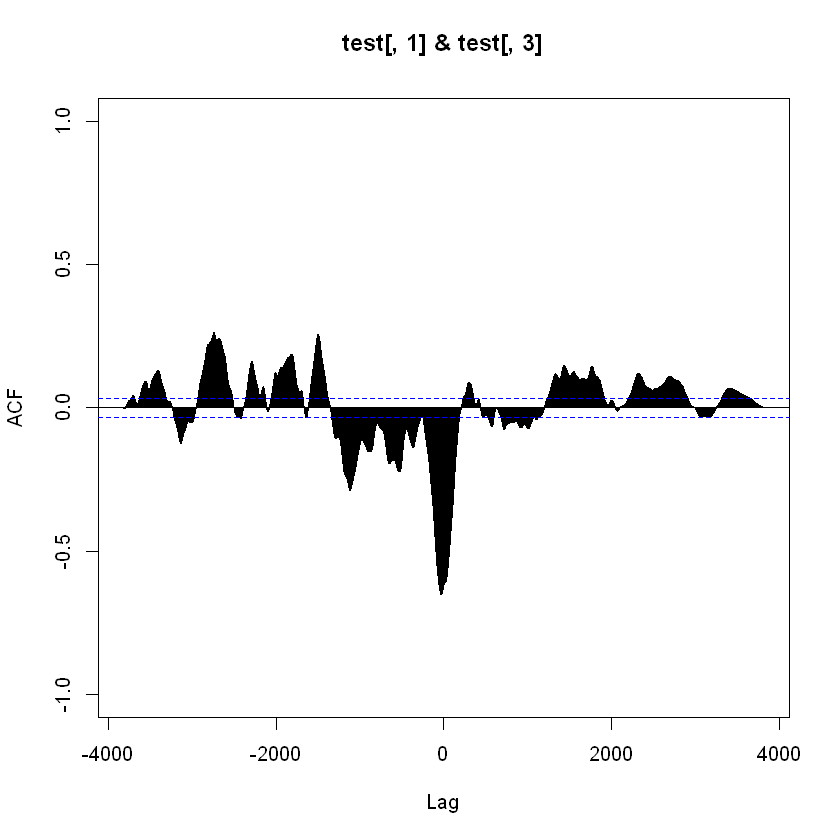

In [122]:
ccf(test[,1], test[,3], lag = 200000, ylim = range(-1,1), type="correlation")

In [123]:
testTS <- ts(test)

In [129]:
length(testTS)
str(testTS)
class(testTS)
names(testTS)
testTS

[1] 22926

 Time-Series [1:3821, 1:6] from 1 to 3821: 8335 8632 8978 9366 9788 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "V1" "V2" "V3" "V4" ...


[1] "mts"    "ts"     "matrix"

NULL

V1,V2,V3,V4,V5,V6
8335.3,5420.2,2109.1,1829.0,4663.9,6507.5
8632.5,5568.8,2149.7,1861.4,4795.7,6753.5
8978.3,5747.2,2191.1,1894.1,4953.2,7039.1
9365.9,5951.6,2232.7,1926.6,5133.5,7359.2
9788.5,6178.5,2273.8,1958.3,5334.0,7708.7
10239.0,6423.9,2313.9,1988.8,5551.3,8081.9
10709.0,6683.5,2352.6,2017.8,5781.9,8472.7
11193.0,6953.6,2389.5,2045.1,6022.4,8875.3
11683.0,7230.3,2424.4,2070.5,6269.4,9283.8
12173.0,7510.0,2457.3,2094.0,6519.4,9692.7


V1,V2,V3,V4,V5,V6
8335.3,5420.2,2109.1,1829.0,4663.9,6507.5
8632.5,5568.8,2149.7,1861.4,4795.7,6753.5
8978.3,5747.2,2191.1,1894.1,4953.2,7039.1
9365.9,5951.6,2232.7,1926.6,5133.5,7359.2
9788.5,6178.5,2273.8,1958.3,5334.0,7708.7
10239.0,6423.9,2313.9,1988.8,5551.3,8081.9
10709.0,6683.5,2352.6,2017.8,5781.9,8472.7
11193.0,6953.6,2389.5,2045.1,6022.4,8875.3
11683.0,7230.3,2424.4,2070.5,6269.4,9283.8
12173.0,7510.0,2457.3,2094.0,6519.4,9692.7


In [116]:
test <- read.table('D:\\wataru\\Recording_Analysis\\Bases_dmPFC-BLA\\2017-12-19_vm81a_base\\myFile.txt', sep = ",")

In [ ]:
data (sales)  # parts of Example 11.2.2 from Brockwell and Davies (1991).
sal <- diff (sales)
led <- diff(lead)
ccf (led, sal, lag = 20, ylim = range(-1,1), type="o")

In [ ]:
set.seed(123)
x = arima.sim(model=list(0.2, 0, 0.5), n = 100)
y = arima.sim(model=list(0.4, 0, 0.4), n = 100)
ccf(x, y, type="correlation")

In [ ]:
readClipboard()

In [ ]:
# setwd("D:/wataru/Recording_Analysis/Bases_dmPFC-BLA")
# theta <- scan('test.txt')
# plot(theta)

theta <- scan('D:\\wataru\\Recording_Analysis\\Bases_dmPFC-BLA\\2017-12-19_vm81a_base\\test.txt')
plot(theta)

---
# Data Types
https://www.statmethods.net/input/datatypes.html

In [6]:
######################################################
# vectors
a <- c(1,2,5.3,6,-2,4) # numeric vector
b <- c("one","two","three") # character vector
c <- c(TRUE,TRUE,TRUE,FALSE,TRUE,FALSE) #logical vector

# Identify rows, columns or elements using subscripts.
a[4]
a[c(2,4)]

######################################################
# matrix
# generates 5 x 4 numeric matrix 
y<-matrix(1:20, nrow=5,ncol=4)
# another example
cells <- c(1,26,24,68)
rnames <- c("R1", "R2")
cnames <- c("C1", "C2") 
mymatrix <- matrix(cells, nrow=2, ncol=2, byrow=TRUE,
  dimnames=list(rnames, cnames))

# Identify rows, columns or elements using subscripts.
x[,4] # 4th column of matrix
x[3,] # 3rd row of matrix 
x[2:4,1:3] # rows 2,3,4 of columns 1,2,3

######################################################
# Data Frames
# A data frame is more general than a matrix, in that different columns can have different
# modes (numeric, character, factor, etc.). This is similar to SAS and SPSS datasets.

d <- c(1,2,3,4)
e <- c("red", "white", "red", NA)
f <- c(TRUE,TRUE,TRUE,FALSE)
mydata <- data.frame(d,e,f)
names(mydata) <- c("ID","Color","Passed") # variable names

# Identify rows, columns or elements using subscripts.
mydata[2:3] # columns 3,4,5 of data frame
mydata[c("ID","Passed")] # columns ID and Age from data frame
mydata$Color # variable x1 in the data frame
mydata[1,3]

######################################################
# The ls() function returns a vector listing lists all the objects (vectors, data frames, etc) in your current workspace.
ls()

# Remove these three objects
rm("first_name", "last_name", "new_df")
 
# Or remove objects listed in a vector
rm(list = c("first_name", "last_name", "new_df"))
 
# Or remove all files from your workspace
rm(list = ls())
 
# Or remove vectors programmatically.  Delete objects with underscore in name
rm(list = ls()[grepl("_", ls())])

######################################################
# Lists
# An ordered collection of objects (components). A list allows you to gather a variety of 
# (possibly unrelated) objects under one name.
# example of a list with 4 components - 
# a string, a numeric vector, a matrix, and a scaler 

w <- list(name="Fred", mynumbers=a, mymatrix=y, age=5.3)

# example of a list containing two lists
# It looks concatenate the two lists
v <- c(w,w)

# Identify elements of a list using the [[]] convention.
mylist[[2]] # 2nd component of the list
mylist[["mynumbers"]] # component named mynumbers in list



######################################################
# Factors
# Tell R that a variable is nominal by making it a factor. The factor stores the nominal
# values as a vector of integers in the range [ 1... k ] (where k is the number of unique 
# values in the nominal variable), and an internal vector of character strings (the original 
# values) mapped to these integers.

# variable gender with 20 "male" entries and 
# 30 "female" entries 
gender <- c(rep("male",20), rep("female", 30)) 
gender <- factor(gender) 
# stores gender as 20 1s and 30 2s and associates
# 1=female, 2=male internally (alphabetically)
# R now treats gender as a nominal variable 
summary(gender)


[1] 6

[1] 2 6

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


# Reading file

test2.csv
```
 prgtype gender  id ses schtyp level
 general      0  70   4      1     1
  vocati      1 121   4      2     1
 general      0  86   4      3     1
  vocati      0 141   4      3     1
academic      0 172   4      2     1
academic      0 113   4      2     1
 general      0  50   3      2     1
academic      0  11   1      2     1
```

